In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import pandas as pd
%matplotlib inline

In [60]:
A = np.array([[-3, -2],[-1, -3]]).reshape(2,2)
B = np.array([6,6]).reshape(2,1)
beta = .4
D = np.array([[beta, beta],[1-beta, 1-beta]]).reshape(2,2)
def fc_dynamics(x, t):
    x = x.reshape(2,1)
    _A = np.array([[-6*D[0][0], -2*D[0][0] + -1*D[0][1]],[-1*D[1][1] + -2*D[1][0], -6*D[1][1]]]).reshape(2,2)
    _B = np.array([D[0][0]*6,D[1][1]*6]).reshape(2,1)
    xdot = np.array([0,0]).reshape(2,1)
    xdot = np.dot(_A,x) + _B
    return xdot.reshape(2)
    

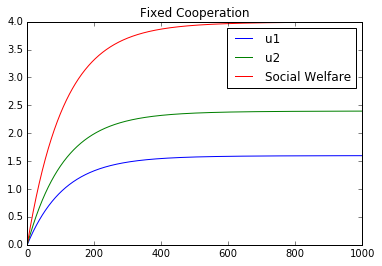

In [61]:
x_0 = np.array([0,0]).reshape(2)
t = np.linspace(0.0, 1.0, 1000)

x = odeint( fc_dynamics, x_0 , t )
df = pd.DataFrame(x)
df.columns=["x1","x2"]
df['Profits 1'] = df["x1"]*(A[0][0]*df["x1"] + A[0][1]*df["x2"] + B[0])
df['Profits 2'] = df["x2"]*(A[1][0]*df["x1"] + A[1][1]*df["x2"] + B[1])
df['u1'] = beta*df['Profits 1'] + beta*df['Profits 2']
df['u2'] = (1-beta)*df['Profits 1'] + (1 - beta)*df['Profits 2']
df['Social Welfare'] = df["Profits 1"] + df["Profits 2"]
df[["u1", "u2", "Social Welfare"]].plot(title="Fixed Cooperation")
plt.savefig("Fixed Cooperation")

In [62]:
print df['u1'].tail(1), '\n', df['u2'].tail(1)

999    1.597225
Name: u1, dtype: float64 
999    2.395838
Name: u2, dtype: float64


In [19]:
print df['Profits 1'].tail(1) +  df['Profits 2'].tail(1)

999    3.993063
dtype: float64


In [20]:
print df['Social Welfare'].tail(1)

999    3.993063
Name: Social Welfare, dtype: float64


In [21]:
print df['Social Welfare'].max()

3.99306314107


In [111]:
#fixed coalition with option to opt out at any moment
# note that, given the option, the players here always go non-cooperative
#Each player gets increases more per turn if they are selfish
A = np.array([[-3, -2],[-1, -3]]).reshape(2,2)
B = np.array([6,6]).reshape(2,1)
beta = .4
D = np.array([[beta, beta],[1-beta, 1-beta]]).reshape(2,2)
def oc_dynamics(x, t):
    x = x.reshape(2,1)
    #marginal gains to utility if they continue to cooperate
    _A = np.array([[-6*D[0][0], -2*D[0][0] + -1*D[0][1]],[-1*D[1][1] + -2*D[1][0], -6*D[1][1]]]).reshape(2,2)
    _B = np.array([D[0][0]*6,D[1][1]*6]).reshape(2,1)
    xdot = np.array([0,0]).reshape(2,1)
    xdot = np.dot(_A,x) + _B
    
    #marginal gains to utility if they were to go it on their own. For simpliciy, assume if one is out, they're both out
    NCA = np.array([[-6, -2],[-1, -6]]).reshape(2,2)
    NCxdot = np.array([0,0]).reshape(2,1)
    NCxdot = np.dot(NCA,x) + B
    print xdot, NCxdot
    #drop dif from no longer cooperating
    pi = np.dot(np.diag(x.reshape(2)),(np.dot(A,x) + B))
    dif0 = pi[0] - beta*(pi[0] + pi[1])
    dif1 = pi[1] - (1 - beta)*(pi[0] + pi[1])
    #print dif1
    
    #need to scale these before taking the max
    if xdot[0] < (NCxdot[0] + dif0) or xdot[1] < (NCxdot[1] + dif1):
        #print 'ind'
        xdot = NCxdot
    
    #put celing on x
    if x[0] <=0 and xdot[0] <=0:
        xdot[0] = 0
    if x[1] <=0 and xdot[1] <=0:
        xdot[1] = 0
#    print xdot
    return xdot.reshape(2)
    

[[ 2.4]
 [ 3.6]] [[ 6.]
 [ 6.]]
[[ 2.39999868]
 [ 3.59999802]] [[ 5.99999707]
 [ 5.99999744]]
[[ 2.39999868]
 [ 3.59999802]] [[ 5.99999707]
 [ 5.99999744]]
[[ 2.39999736]
 [ 3.59999604]] [[ 5.99999414]
 [ 5.99999487]]
[[ 2.39999736]
 [ 3.59999604]] [[ 5.99999414]
 [ 5.99999487]]
[[ 2.38808941]
 [ 3.58213247]] [[ 5.97353263]
 [ 5.97683716]]
[[ 2.38808936]
 [ 3.58213239]] [[ 5.97353251]
 [ 5.97683707]]
[[ 2.37623179]
 [ 3.56434111]] [[ 5.94718419]
 [ 5.95377065]]
[[ 2.37623168]
 [ 3.56434097]] [[ 5.94718395]
 [ 5.95377047]]
[[ 2.36442424]
 [ 3.54662162]] [[ 5.92094822]
 [ 5.93079488]]
[[ 2.36442414]
 [ 3.54662147]] [[ 5.92094798]
 [ 5.9307947 ]]
[[ 2.31365682]
 [ 3.47039755]] [[ 5.80815873]
 [ 5.83193188]]
[[ 2.31365602]
 [ 3.47039644]] [[ 5.80815693]
 [ 5.83193051]]
[[ 2.32645015]
 [ 3.48961176]] [[ 5.83657938]
 [ 5.85685713]]
[[ 2.3264497 ]
 [ 3.48961113]] [[ 5.83657837]
 [ 5.85685635]]
[[ 2.28899324]
 [ 3.43334454]] [[ 5.75337214]
 [ 5.78385749]]
[[ 2.28899374]
 [ 3.43334524]] [[ 5.75

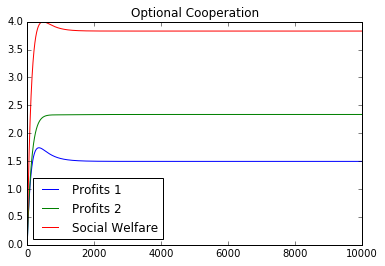

In [116]:
x_0 = np.array([0,0]).reshape(2)
t = np.linspace(0.0, 5.0, 10000)

x = odeint( oc_dynamics, x_0 , t )
df = pd.DataFrame(x)
df.columns=["x1","x2"]
df['Profits 1'] = df["x1"]*(A[0][0]*df["x1"] + A[0][1]*df["x2"] + B[0])
df['Profits 2'] = df["x2"]*(A[1][0]*df["x1"] + A[1][1]*df["x2"] + B[1])
df['u1'] = beta*df['Profits 1'] + beta*df['Profits 2']
df['u2'] = (1-beta)*df['Profits 1'] + (1 - beta)*df['Profits 2']
df['Social Welfare'] = df["Profits 1"] + df["Profits 2"]
df[["Profits 1", "Profits 2", "Social Welfare"]].plot(title="Optional Cooperation")
plt.savefig("Optionaly Cooperative")

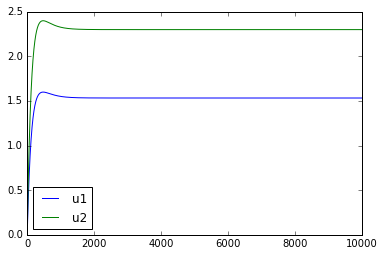

In [117]:
df[['u1', 'u2']].plot()

In [118]:
print df['u1'].tail(), '\n', df['u2'].tail()

9995    1.53218
9996    1.53218
9997    1.53218
9998    1.53218
9999    1.53218
Name: u1, dtype: float64 
9995    2.29827
9996    2.29827
9997    2.29827
9998    2.29827
9999    2.29827
Name: u2, dtype: float64


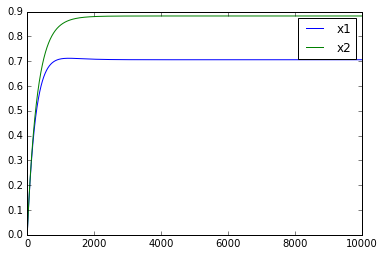

In [119]:
df[['x1','x2']].plot()